In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import shelve
%matplotlib inline 

In [2]:
X = np.array([[ 8, 14],
       [27, 23],
       [29, 22],
       [31, 44],
       [19, 49],
       [40, 35],
       [44, 25],
       [30,  6],
       [ 8, 25],
       [30, 21],
       [ 4, 17],
       [12, 50],
       [41, 20],
       [36, 18],
       [ 4, 22],
       [11, 36],
       [ 3, 29],
       [ 7, 22],
       [13, 48],
       [34, 32],
       [31,  4],
       [15, 20],
       [11, 31],
       [27, 28],
       [44, 18],
       [27, 16],
       [38,  5],
       [30, 26],
       [19, 24],
       [46, 38]])

In [3]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X ans initial centroids
    return X[np.random.choice(X.shape[0], k)]

In [4]:
def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)

In [5]:
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[np.where(labels == k)]
        # take average
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids as the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [6]:
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, 3)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centroids))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        
        if has_converged(centroids, new_centroids):
        	break
        centroids = new_centroids
        it += 1
    return (centroids, labels, it)

In [7]:
centroids = [kmeans_init_centroids(X, 3)]

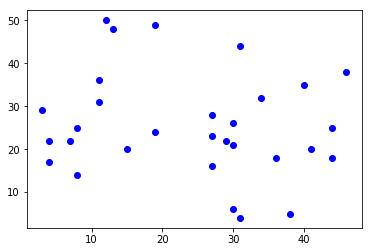

In [8]:
plt.plot(X[:,0], X[:, 1], "bo")
plt.show()

In [9]:
centroids = np.array(centroids[0])

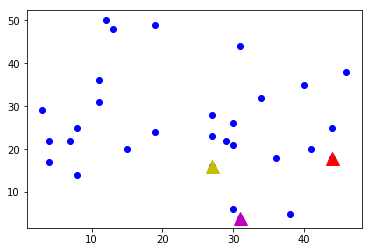

In [10]:
plt.plot(X[:,0], X[:, 1], "bo")
plt.plot(centroids[0][0], centroids[0][1], "r^", markersize=13)
plt.plot(centroids[1][0], centroids[1][1], "y^", markersize=13)
plt.plot(centroids[2][0], centroids[2][1], "m^", markersize=13)

plt.show()

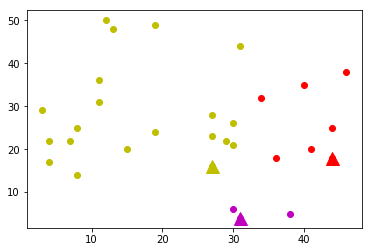

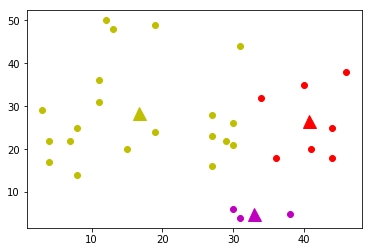

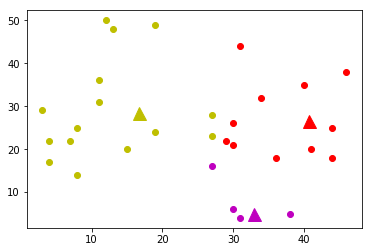

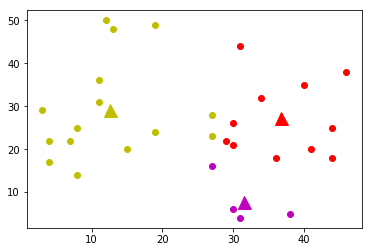

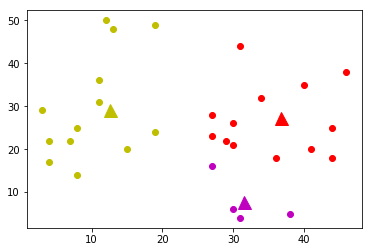

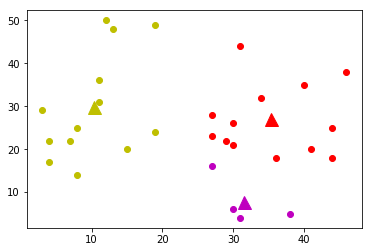

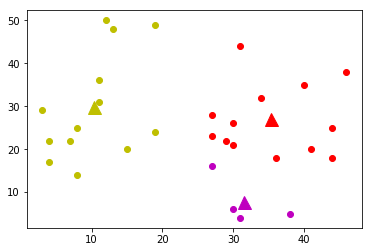

In [11]:
while True:
    Y = kmeans_assign_labels(X, centroids)
    plt.plot(X[np.where(Y==0)][:,0], X[np.where(Y==0)][:, 1], "ro")
    plt.plot(X[np.where(Y==1)][:,0], X[np.where(Y==1)][:, 1], "yo")
    plt.plot(X[np.where(Y==2)][:,0], X[np.where(Y==2)][:, 1], "mo")
    plt.plot(centroids[0][0], centroids[0][1], "r^", markersize=13)
    plt.plot(centroids[1][0], centroids[1][1], "y^", markersize=13)
    plt.plot(centroids[2][0], centroids[2][1], "m^", markersize=13)

    plt.show()
    new_centroids = kmeans_update_centroids(X, Y, 3)
        
    if has_converged(centroids, new_centroids):
        break
    
    centroids = new_centroids
    plt.plot(X[np.where(Y==0)][:,0], X[np.where(Y==0)][:, 1], "ro")
    plt.plot(X[np.where(Y==1)][:,0], X[np.where(Y==1)][:, 1], "yo")
    plt.plot(X[np.where(Y==2)][:,0], X[np.where(Y==2)][:, 1], "mo")
    plt.plot(centroids[0][0], centroids[0][1], "r^", markersize=13)
    plt.plot(centroids[1][0], centroids[1][1], "y^", markersize=13)
    plt.plot(centroids[2][0], centroids[2][1], "m^", markersize=13)

    plt.show()

In [12]:
centroids

array([[35.30769231, 26.92307692],
       [10.30769231, 29.76923077],
       [31.5       ,  7.75      ]])